# Task 2: Change Point Modeling and Insight Generation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sys.path.append(os.path.abspath("../Change"))
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("..")

In [4]:
from Change.load_data import *

##### 1. Data Loading

In [5]:
df = load_and_prepare_data('Data/BrentOilPrices.csv')
df

,Price,LogReturn
Date,,
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612
1987-05-27,18.60,-0.001612
...,...,...
2022-11-08,96.85,-0.030706
2022-11-09,93.05,-0.040026
2022-11-10,94.25,0.012814


##### 2. Data Collection for Brent Oil Price Return

In [6]:
df['LogReturn']

Date
1987-05-21   -0.009709
1987-05-22    0.005405
1987-05-25    0.002692
1987-05-26    0.001612
1987-05-27   -0.001612
                ...   
2022-11-08   -0.030706
2022-11-09   -0.040026
2022-11-10    0.012814
2022-11-11    0.022244
2022-11-14   -0.029271
Name: LogReturn, Length: 9010, dtype: float64

In [7]:
# df = df.set_index('Date')
# df.index = pd.to_datetime(df.index)
# print(df.head())
# df['Price']  = df['Price'].interpolate(methdo ='time')
# df

##### 3. Price and Log Return for Brent Oil

In [7]:
try:
      df = df.dropna(subset=['Price'])
      # df['LogReturn'] = np.log(df['Price'] / df['Price'].shift(1))
      df['LogReturn'] = np.log(df['Price'] .diff().dropna())

      time_series_price = df['Price']
      time_series_price_return =  df['LogReturn'] .dropna()
      # plt.show()
      # df['price_diff'] = df['Price'].diff()
      print("Brent Oil Prices First 5 Record:")
      display( time_series_price.head())
      print("\nBrent Oil Prices Last 5 Record:")
      display( time_series_price.tail())
      print("\nBrent Oil Log return First 5 Record:")
      display( time_series_price_return.head())
      print("\nBrent Oil Log return Last 5 Record:")
      display( time_series_price_return.tail())
      # display( time_series_price_return.tail())
except FileNotFoundError:
      print(f"File {df} not found. Please check the file path.")
except Exception as e:
      print(f"An error occurred: {e}")

Brent Oil Prices First 5 Record:


Date
1987-05-21    18.45
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
1987-05-27    18.60
Name: Price, dtype: float64


Brent Oil Prices Last 5 Record:


Date
2022-11-08    96.85
2022-11-09    93.05
2022-11-10    94.25
2022-11-11    96.37
2022-11-14    93.59
Name: Price, dtype: float64


Brent Oil Log return First 5 Record:


Date
1987-05-22   -2.302585
1987-05-25   -2.995732
1987-05-26   -3.506558
1987-05-28        -inf
1987-06-01   -2.659260
Name: LogReturn, dtype: float64


Brent Oil Log return Last 5 Record:


Date
2022-11-02   -0.051293
2022-11-04    1.444563
2022-11-07   -1.078810
2022-11-10    0.182322
2022-11-11    0.751416
Name: LogReturn, dtype: float64

##### 4. Data Cleaning

In [8]:
# Replace -inf and inf with NaN
df['LogReturn'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (optional)
df.dropna(subset=['LogReturn'], inplace=True)

The clean Brent Oil Log retuns 

In [9]:
try:
      df = df.dropna(subset=['Price'])
      # df['log_returns'] = np.log(df['Price'] / df['Price'].shift(1))
      df['LogReturn'] = np.log(df['Price'] .diff().dropna())

      time_series_price = df['Price']
      time_series_price_return =  df['LogReturn'] .dropna()
      # plt.show()
      # df['price_diff'] = df['Price'].diff()
      print("Brent Oil Prices First 5 Record:")
      display( time_series_price.head())
      print("\nBrent Oil Prices Last 5 Record:")
      display( time_series_price.tail())
      print("\nBrent Oil Log return First 5 Record:")
      display( time_series_price_return.head())
      print("\nBrent Oil Log return Last 5 Record:")
      display( time_series_price_return.tail())
      # display( time_series_price_return.tail())
except FileNotFoundError:
      print(f"File {df} not found. Please check the file path.")
except Exception as e:
      print(f"An error occurred: {e}")

Brent Oil Prices First 5 Record:


Date
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
1987-06-01    18.65
1987-06-02    18.68
Name: Price, dtype: float64


Brent Oil Prices Last 5 Record:


Date
2022-11-02    96.07
2022-11-04    99.53
2022-11-07    99.87
2022-11-10    94.25
2022-11-11    96.37
Name: Price, dtype: float64


Brent Oil Log return First 5 Record:


Date
1987-05-25   -2.995732
1987-05-26   -3.506558
1987-06-01   -3.912023
1987-06-02   -3.506558
1987-06-03   -2.659260
Name: LogReturn, dtype: float64


Brent Oil Log return Last 5 Record:


Date
2022-11-01   -0.733969
2022-11-02   -0.051293
2022-11-04    1.241269
2022-11-07   -1.078810
2022-11-11    0.751416
Name: LogReturn, dtype: float64

##### Graphical Representation of Brent Oil Log Return

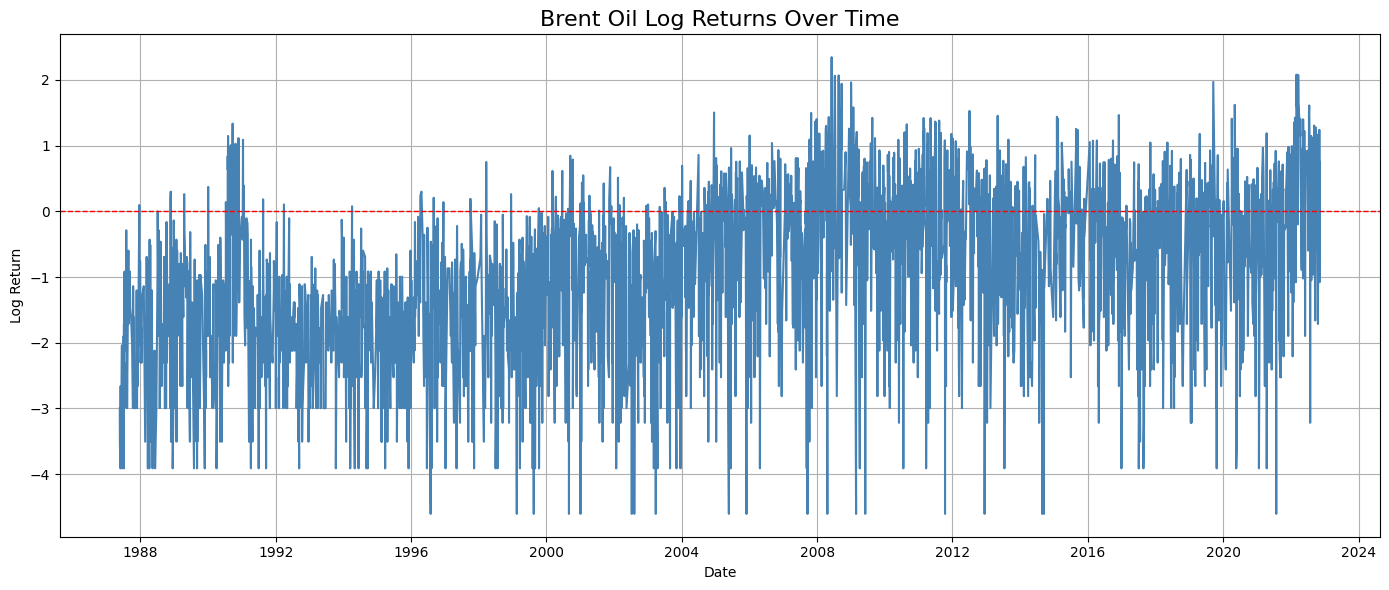

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='LogReturn', data=df, color='steelblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Brent Oil Log Returns Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.tight_layout()
plt.show()

Bayesian Volatility Model Sampling is Comepelete,  Summary of Parameters:

In [ ]:
print("\nRunning Bayesian Change Point Detection...")
model, trace = bayesian_change_point_model(df['LogReturn'].values)


Running Bayesian Change Point Detection...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma]


##### Change Point Detection

In [ ]:
print("\nModel Summary and Interpretation:")
summarize_results(trace, df)